In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_palette('twilight')
sns.set_style('darkgrid')
sns.set

<function seaborn.rcmod.set(*args, **kwargs)>

In [2]:
train = pd.read_csv('../../train.csv')
test = pd.read_csv('../../test.csv')
data = pd.concat([train, test], axis = 0)

In [3]:
data = data.reset_index(drop=True)

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

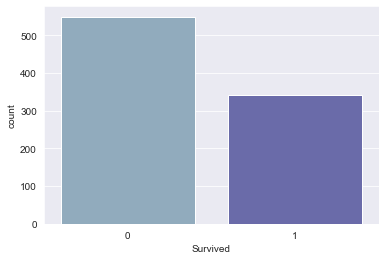

In [5]:
sns.countplot(x = 'Survived', data = train)

([<matplotlib.patches.Wedge at 0x16cc4bd5790>,
 [Text(-0.3925749350994583, 1.0275626113924428, 'Survived'),
  Text(0.3925750313068116, -1.0275625746369201, 'Die')],
 [Text(-0.21413178278152267, 0.5604886971231505, '61.62%'),
  Text(0.21413183525826085, -0.5604886770746836, '38.38%')])

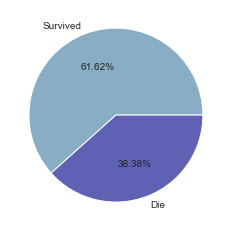

In [6]:
plt.pie(train['Survived'].value_counts().tolist(), autopct='%.2f%%', labels = ['Survived', 'Die'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [10]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
train['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [12]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [13]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [14]:
train['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

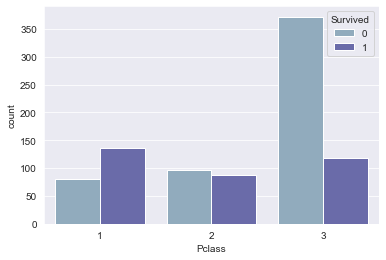

In [15]:
sns.countplot(data = train, x = 'Pclass', hue = 'Survived')

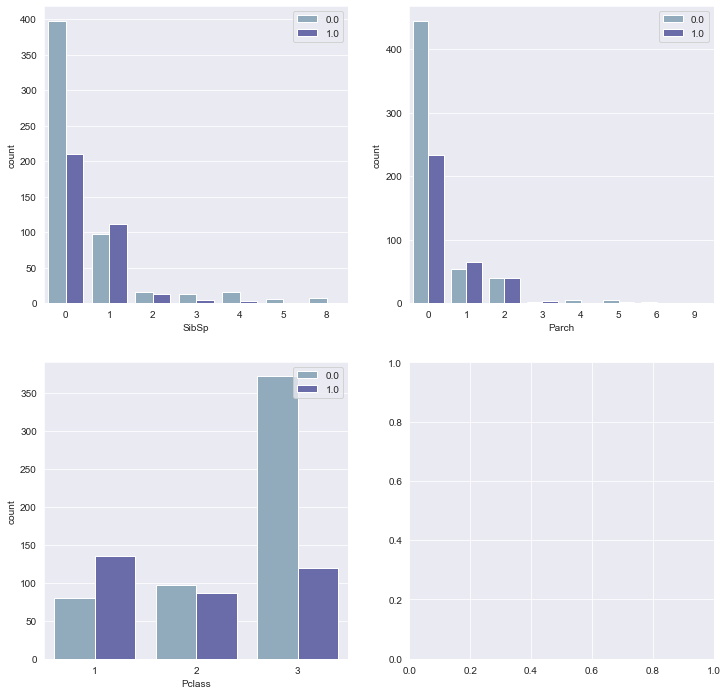

In [16]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 12))

for i, column in enumerate(['SibSp', 'Parch', 'Pclass']):
    g = sns.countplot(data = data, x = column, hue = 'Survived', ax = ax[i//2][i%2])
    ax[i//2][i%2].legend(loc = 'upper right')

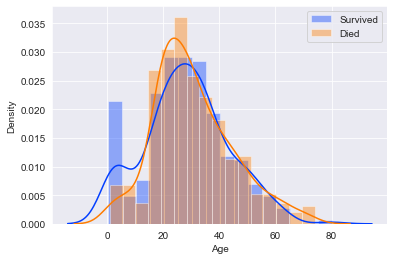

In [17]:
sns.set_palette('bright')
suv_0 = data['Survived'] == 0
suv_1 = data['Survived'] == 1
sns.distplot(data[suv_1]['Age'], label = 'Survived')
sns.distplot(data[suv_0]['Age'], label = 'Died')
plt.legend()

<AxesSubplot:xlabel='Sex', ylabel='count'>

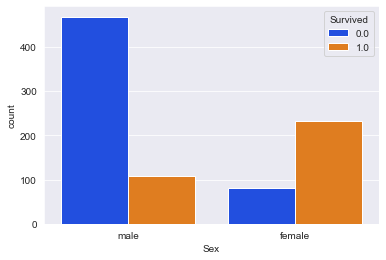

In [18]:
sns.countplot(data = data, x = 'Sex', hue = 'Survived')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

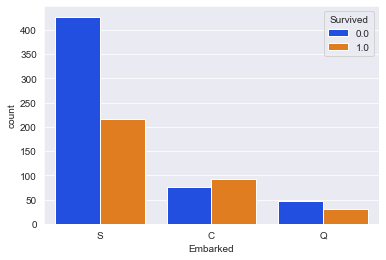

In [19]:
sns.countplot(data = data, x = 'Embarked', hue = 'Survived')

<AxesSubplot:>

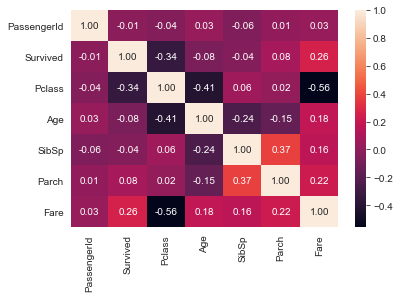

In [20]:
corr = data.corr()
sns.heatmap(corr, annot = True, fmt = '.2f')

In [21]:
data['Cabin'] = data['Cabin'].str[0]

<AxesSubplot:xlabel='Cabin', ylabel='count'>

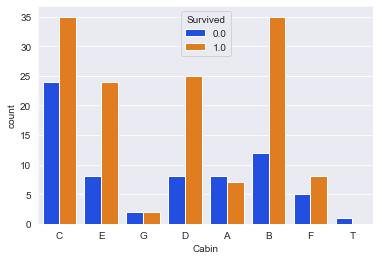

In [22]:
sns.countplot(data = data, x = 'Cabin', hue = 'Survived')

<AxesSubplot:xlabel='Cabin', ylabel='count'>

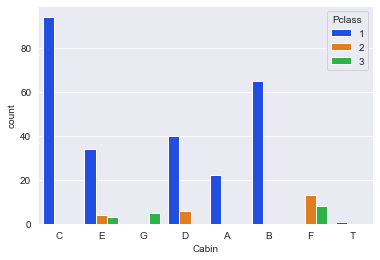

In [23]:
sns.countplot(data = data, x = 'Cabin', hue = 'Pclass')

In [24]:
group = data.groupby('Pclass')['Cabin'].value_counts()
for p in [1, 2, 3]:
    data.loc[(data['Pclass'] == p) & (data['Cabin'].isnull()), 'Cabin'] = group[p].index[0]

In [25]:
data['Cabin'].value_counts()

F    968
C    161
B     65
D     46
E     41
A     22
G      5
T      1
Name: Cabin, dtype: int64

<AxesSubplot:xlabel='Cabin', ylabel='count'>

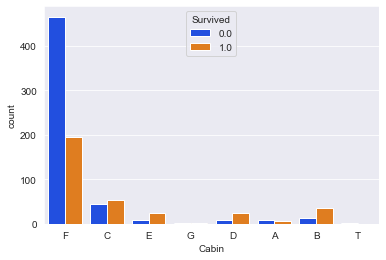

In [26]:
sns.countplot(data = data, x = 'Cabin', hue = 'Survived')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [28]:
data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [29]:
data['Embarked'] = data['Embarked'].fillna('S')

In [30]:
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

<AxesSubplot:xlabel='Age', ylabel='Density'>

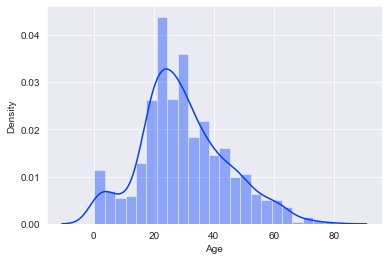

In [31]:
sns.distplot(data['Age'])

In [32]:
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,F,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,F,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,F,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,F,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,F,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,F,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,F,C


In [33]:
data['Name'] = data['Name'].apply(lambda x : x.split(', ')[1].split('.')[0])

In [34]:
data.groupby('Name')['Age'].value_counts()

Name          Age 
Capt          70.0    1
Col           47.0    1
              53.0    1
              56.0    1
              60.0    1
                     ..
Rev           51.0    1
              54.0    1
              57.0    1
Sir           49.0    1
the Countess  33.0    1
Name: Age, Length: 229, dtype: int64

In [35]:
pd.crosstab(data['Sex'], data['Name'])

Name,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [36]:
def Name_Chage(x):
    if x in ['Capt', 'Jonkheer', 'the Countess', 'Dr']:
        return 'unknown'
    if x in ['Col', 'Don', 'Major', 'Rev', 'Sir']:
        return 'Mr'
    if x in ['Dona', 'Lady', 'Miss', 'Mlle', 'Mme', 'Mrs']:
        return 'Ms'
    return x

data['Name'] = data['Name'].apply(lambda x : Name_Chage(x))

In [45]:
for name in data['Name'].unique():
    data.loc[(data['Name'] == name) & (data['Age'].isnull()), 'Age'] = data.groupby('Name')['Age'].median()[name]

In [48]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,F,S
1,2,1.0,1,Ms,female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1.0,3,Ms,female,26.0,0,0,STON/O2. 3101282,7.9250,F,S
3,4,1.0,1,Ms,female,35.0,1,0,113803,53.1000,C,S
4,5,0.0,3,Mr,male,35.0,0,0,373450,8.0500,F,S


In [49]:
data['Family_Size'] = data['SibSp'] + data['Parch']

<AxesSubplot:xlabel='Family_Size', ylabel='count'>

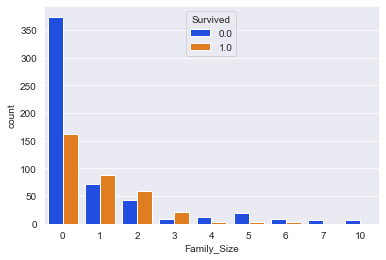

In [54]:
sns.countplot(data = data, x = 'Family_Size', hue = 'Survived')

<AxesSubplot:>

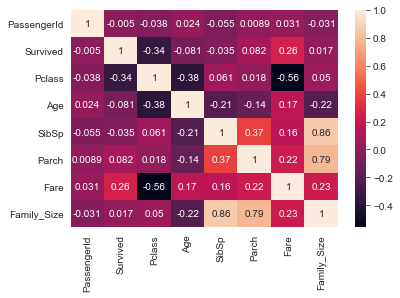

In [55]:
corr = data.corr()
sns.heatmap(corr, annot = True)

In [57]:
data['Ticket'].value_counts()

CA. 2343            11
1601                 8
CA 2144              8
PC 17608             7
3101295              7
                    ..
STON/O2. 3101271     1
394140               1
349227               1
2647                 1
C.A. 34260           1
Name: Ticket, Length: 929, dtype: int64

In [73]:
data['Ticket_Num'] = data.groupby('Ticket')['Embarked'].value_counts()

Ticket       Embarked
110152       S           3
110413       S           3
110465       S           2
110469       S           1
110489       S           1
                        ..
W./C. 6608   S           5
W./C. 6609   S           1
W.E.P. 5734  S           2
W/C 14208    S           1
WE/P 5735    S           2
Name: Embarked, Length: 931, dtype: int64

In [118]:
import re
data['Ticket_Num'] = data['Ticket'].apply(lambda x : re.sub('[^a-zA-z]', '', x))

In [125]:
data['Ticket_Num'] = data['Ticket_Num'].replace('', 'onum')

In [128]:
pd.crosstab(data['Ticket_Num'], data['Survived'])

Survived,0.0,1.0
Ticket_Num,,
A,26,2
AS,1,0
C,3,2
CA,27,14
CASOTON,1,0
FC,1,0
FCC,1,4
Fa,1,0
LINE,3,1


<AxesSubplot:xlabel='Fare', ylabel='Density'>

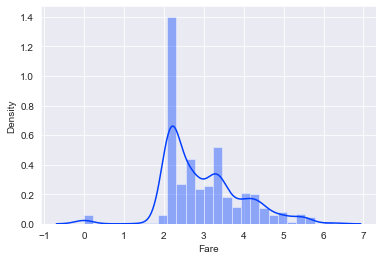

In [138]:
sns.distplot(np.log1p(data['Fare']))

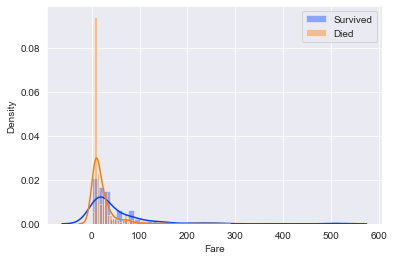

In [140]:
sns.set_palette('bright')
suv_0 = data['Survived'] == 0
suv_1 = data['Survived'] == 1
sns.distplot(data[suv_1]['Fare'], label = 'Survived')
sns.distplot(data[suv_0]['Fare'], label = 'Died')
plt.legend()

In [141]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Ticket_Num
0,1,0.0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,F,S,1,A
1,2,1.0,1,Ms,female,38.0,1,0,PC 17599,71.2833,C,C,1,PC
2,3,1.0,3,Ms,female,26.0,0,0,STON/O2. 3101282,7.9250,F,S,0,STONO
3,4,1.0,1,Ms,female,35.0,1,0,113803,53.1000,C,S,1,onum
4,5,0.0,3,Mr,male,35.0,0,0,373450,8.0500,F,S,0,onum


In [142]:
data.drop(['Ticket', 'Ticket_Num'], axis = 1, inplace = True)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

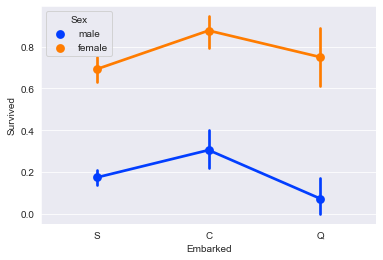

In [146]:
sns.pointplot(data = data, x = 'Embarked', y = 'Survived', hue = 'Sex')

<AxesSubplot:xlabel='Cabin', ylabel='Survived'>

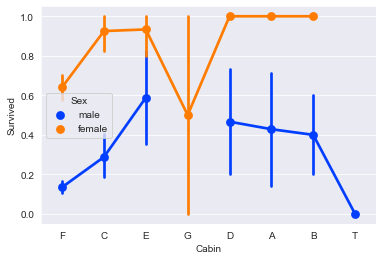

In [147]:
sns.pointplot(data = data, x = 'Cabin', y = 'Survived', hue = 'Sex')

<AxesSubplot:xlabel='Family_Size', ylabel='Survived'>

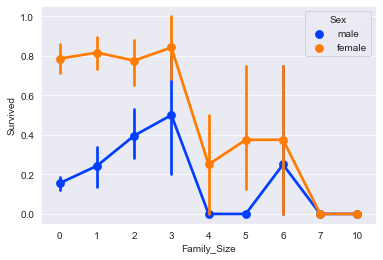

In [148]:
sns.pointplot(data = data, x = 'Family_Size', y = 'Survived', hue = 'Sex')

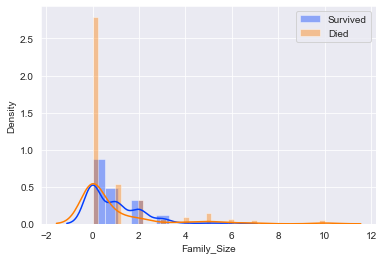

In [149]:
sns.set_palette('bright')
suv_0 = data['Survived'] == 0
suv_1 = data['Survived'] == 1
sns.distplot(data[suv_1]['Family_Size'], label = 'Survived')
sns.distplot(data[suv_0]['Family_Size'], label = 'Died')
plt.legend()

In [150]:
data['Family_1_to_3'] = 0
data.loc[(data['Family_Size'] >= 1) & (data['Family_Size'] <= 3), 'Family_1_to_3'] = 1

<AxesSubplot:xlabel='Family_1_to_3', ylabel='Survived'>

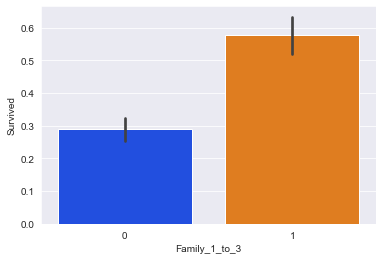

In [151]:
sns.barplot(data = data, x = 'Family_1_to_3', y = 'Survived')

In [173]:
data['Fare_Band'] = pd.qcut(data['Fare'], 4)

<AxesSubplot:xlabel='Fare_Band', ylabel='Survived'>

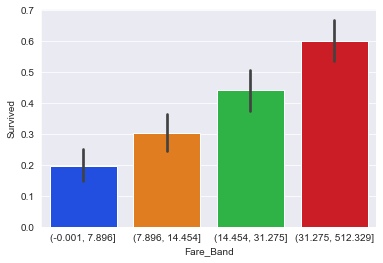

In [174]:
sns.barplot(data = data, x = 'Fare_Band', y = 'Survived')

<AxesSubplot:xlabel='Age_Band', ylabel='Survived'>

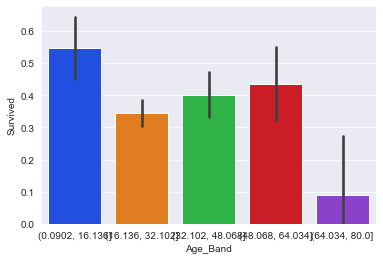

In [180]:
data['Age_Band'] = pd.cut(data['Age'], 5)
sns.barplot(data = data, x = 'Age_Band', y = 'Survived')

In [183]:
data.drop(['SibSp', 'Parch'], axis = 1, inplace = True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Family_Size,Family_1_to_3,Fare_Band,Age_Band
0,1,0.0,3,Mr,male,22.0,7.2500,F,S,1,1,"(-0.001, 7.896]","(16.136, 32.102]"
1,2,1.0,1,Ms,female,38.0,71.2833,C,C,1,1,"(31.275, 512.329]","(32.102, 48.068]"
2,3,1.0,3,Ms,female,26.0,7.9250,F,S,0,0,"(7.896, 14.454]","(16.136, 32.102]"
3,4,1.0,1,Ms,female,35.0,53.1000,C,S,1,1,"(31.275, 512.329]","(32.102, 48.068]"
4,5,0.0,3,Mr,male,35.0,8.0500,F,S,0,0,"(7.896, 14.454]","(32.102, 48.068]"


<AxesSubplot:xlabel='Cabin_E_D_B', ylabel='Survived'>

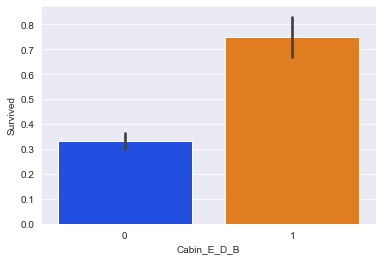

In [188]:
data['Cabin_E_D_B'] = 0
data.loc[(data['Cabin'] == 'E') | (data['Cabin'] == 'D') | (data['Cabin'] == 'B'), 'Cabin_E_D_B'] = 1
sns.barplot(data = data, x = 'Cabin_E_D_B', y = 'Survived')

In [189]:
data.drop(['Age', 'Name', 'Cabin', 'Family_Size', 'Fare'], axis = 1, inplace = True)
data.head()

,PassengerId,Survived,Pclass,Sex,Embarked,Family_1_to_3,Fare_Band,Age_Band,Cabin_E_D_B
0,1,0.0,3,male,S,1,"(-0.001, 7.896]","(16.136, 32.102]",0
1,2,1.0,1,female,C,1,"(31.275, 512.329]","(32.102, 48.068]",0
2,3,1.0,3,female,S,0,"(7.896, 14.454]","(16.136, 32.102]",0
3,4,1.0,1,female,S,1,"(31.275, 512.329]","(32.102, 48.068]",0
4,5,0.0,3,male,S,0,"(7.896, 14.454]","(32.102, 48.068]",0


In [202]:
for column in ['Sex', 'Fare_Band', 'Age_Band', 'Cabin_E_D_B', 'Embarked']:
    data[column] = pd.factorize(data[column])[0]
data.head()

,PassengerId,Survived,Pclass,Sex,Embarked,Family_1_to_3,Fare_Band,Age_Band,Cabin_E_D_B
0,1,0.0,3,0,0,1,0,0,0
1,2,1.0,1,1,1,1,1,1,0
2,3,1.0,3,1,0,0,2,0,0
3,4,1.0,1,1,0,1,1,1,0
4,5,0.0,3,0,0,0,2,1,0


In [206]:
data.head()

,PassengerId,Survived,Pclass,Sex,Embarked,Family_1_to_3,Fare_Band,Age_Band,Cabin_E_D_B
0,1,0.0,3,0,0,1,0,0,0
1,2,1.0,1,1,1,1,1,1,0
2,3,1.0,3,1,0,0,2,0,0
3,4,1.0,1,1,0,1,1,1,0
4,5,0.0,3,0,0,0,2,1,0


In [207]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

train_df = data[~data['Survived'].isnull()]
test_df = data[data['Survived'].isnull()]

In [224]:
X_train, X_valid, y_train, y_valid = train_test_split(train_df.drop(['Survived', 'PassengerId'], axis = 1), train_df['Survived'],
                                                     test_size = .2, stratify = train_df['Survived'], random_state = 42)

In [225]:
fold = KFold(n_splits = 5, shuffle = True, random_state = 42)

param = {'max_depth' : [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
         'min_samples_split': [2, 4, 6, 8, 10, 12],
         'min_samples_leaf': [5, 10, 15, 20, 25],
         'max_features': ['auto', 'sqrt']
         }

rf_clf = RandomForestClassifier(n_estimators = 500, random_state = 42, n_jobs = -1)
rnd_search = RandomizedSearchCV(rf_clf, param, n_iter = 10, cv = 5, verbose=100)
rnd_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=18 
[CV]  min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=18, score=0.804, total=   1.3s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[CV] min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=18 
[CV]  min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=18, score=0.762, total=   0.8s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s
[CV] min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=18 
[CV]  min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=18, score=0.866, total=   0.7s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.7s remaining:    0.0s
[CV] min_samples_split=10, min_samples_leaf=5, max_fea

[CV]  min_samples_split=8, min_samples_leaf=20, max_features=auto, max_depth=12, score=0.783, total=   0.6s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:   21.6s remaining:    0.0s
[CV] min_samples_split=8, min_samples_leaf=20, max_features=auto, max_depth=12 
[CV]  min_samples_split=8, min_samples_leaf=20, max_features=auto, max_depth=12, score=0.762, total=   0.7s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:   22.4s remaining:    0.0s
[CV] min_samples_split=8, min_samples_leaf=20, max_features=auto, max_depth=12 
[CV]  min_samples_split=8, min_samples_leaf=20, max_features=auto, max_depth=12, score=0.831, total=   0.6s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:   23.0s remaining:    0.0s
[CV] min_samples_split=8, min_samples_leaf=20, max_features=auto, max_depth=12 
[CV]  min_samples_split=8, min_samples_leaf=20, max_features=auto, max_depth=12, score=0.824, total=   0.6s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   23.6s remaining:    0.0s
[CV] min

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_estimators=500, n_jobs=-1,
                                                    random_state=42),
                   param_distributions={'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      16, 18, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [5, 10, 15, 20, 25],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12]},
                   verbose=100)

In [226]:
best_params = rnd_search.best_params_
rf_clf = RandomForestClassifier(n_estimators = 500, random_state = 42, n_jobs = -1, **best_params)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_valid, y_valid)

0.8324022346368715

<AxesSubplot:>

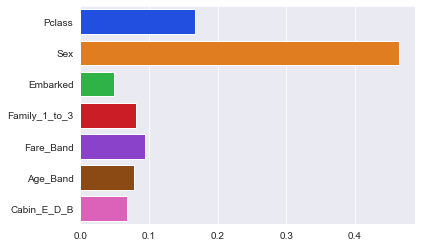

In [228]:
rf_clf.feature_importances_
sns.barplot(x = rf_clf.feature_importances_, y = data.drop(['PassengerId', 'Survived'], axis = 1).columns)

In [233]:
predict = rf_clf.predict(test_df.drop(['PassengerId', 'Survived'], axis = 1))

In [235]:
submit = pd.DataFrame({'PassengerId': test_df['PassengerId'].tolist(),
                      'Survived': predict.astype(int)})

In [237]:
submit.to_csv('titanic_project.csv', index = False)